In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import cmocean

In [3]:
mesh = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')

In [4]:
import datetime
import os
HINDCAST_PATH = '/results/SalishSea/nowcast-green/'
import pickle

In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [8]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [6]:
jan17 = pickle.load(open('2017test/jan17depths.pkl', 'rb'))

In [7]:
feb17 = pickle.load(open('2017test/feb17depths.pkl', 'rb'))
mar17 = pickle.load(open('2017test/mar17depths.pkl', 'rb'))
apr17 = pickle.load(open('2017test/apr17depths.pkl', 'rb'))
may17 = pickle.load(open('2017test/may17depths.pkl', 'rb'))
jun17 = pickle.load(open('2017test/jun17depths.pkl', 'rb'))

In [9]:
jul17 = pickle.load(open('2017test/jul17depths.pkl', 'rb'))
aug17 = pickle.load(open('2017test/aug17depths.pkl', 'rb'))
sep17 = pickle.load(open('2017test/sep17depths.pkl', 'rb'))
oct17 = pickle.load(open('2017test/oct17depths.pkl', 'rb'))
nov17 = pickle.load(open('2017test/nov17depths.pkl', 'rb'))
dec17 = pickle.load(open('2017test/dec17depths.pkl', 'rb'))

In [11]:
jan17b = np.reshape(np.ma.masked_array(jan17,
                            mask = 1 - 
                            (mesh.variables['tmask'][0,0,350:750:5,100::5]
                             *np.ones((jan17.shape[0],1,1)))).compressed(), 
                   ((jan17.shape[0], -1)))
feb17b = np.reshape(np.ma.masked_array(feb17,
                            mask = 1 - 
                            (mesh.variables['tmask'][0,0,350:750:5,100::5]
                             *np.ones((feb17.shape[0],1,1)))).compressed(), 
                   ((feb17.shape[0], -1)))
mar17b = np.reshape(np.ma.masked_array(mar17,
                            mask = 1 - 
                            (mesh.variables['tmask'][0,0,350:750:5, 100::5]
                             *np.ones((mar17.shape[0],1,1)))).compressed(), 
                   ((mar17.shape[0], -1)))
apr17b = np.reshape(np.ma.masked_array(apr17,
                            mask = 1 - 
                            (mesh.variables['tmask'][0,0,350:750:5,100::5]
                             *np.ones((apr17.shape[0],1,1)))).compressed(), 
                   ((apr17.shape[0], -1)))
may17b = np.reshape(np.ma.masked_array(may17,
                            mask = 1 - 
                            (mesh.variables['tmask'][0,0,350:750:5,100::5]
                             *np.ones((may17.shape[0],1,1)))).compressed(), 
                   ((may17.shape[0], -1)))
jun17b = np.reshape(np.ma.masked_array(jun17,
                            mask = 1 - 
                            (mesh.variables['tmask'][0,0,350:750:5,100::5]
                             *np.ones((jun17.shape[0],1,1)))).compressed(), 
                   ((jun17.shape[0], -1)))
jul17b = np.reshape(np.ma.masked_array(jul17,
                            mask = 1 - 
                            (mesh.variables['tmask'][0,0,350:750:5,100::5]
                             *np.ones((jul17.shape[0],1,1)))).compressed(), 
                   ((jul17.shape[0], -1)))
aug17b = np.reshape(np.ma.masked_array(aug17,
                            mask = 1 - 
                            (mesh.variables['tmask'][0,0,350:750:5,100::5]
                             *np.ones((aug17.shape[0],1,1)))).compressed(), 
                   ((aug17.shape[0], -1)))
sep17b = np.reshape(np.ma.masked_array(sep17,
                            mask = 1 - 
                            (mesh.variables['tmask'][0,0,350:750:5,100::5]
                             *np.ones((sep17.shape[0],1,1)))).compressed(), 
                   ((sep17.shape[0], -1)))
oct17b = np.reshape(np.ma.masked_array(oct17,
                            mask = 1 - 
                            (mesh.variables['tmask'][0,0,350:750:5,100::5]
                             *np.ones((oct17.shape[0],1,1)))).compressed(), 
                   ((oct17.shape[0], -1)))
nov17b = np.reshape(np.ma.masked_array(nov17,
                            mask = 1 - 
                            (mesh.variables['tmask'][0,0,350:750:5,100::5]
                             *np.ones((nov17.shape[0],1,1)))).compressed(), 
                   ((nov17.shape[0], -1)))
dec17b = np.reshape(np.ma.masked_array(dec17,
                            mask = 1 - 
                            (mesh.variables['tmask'][0,0,350:750:5,100::5]
                             *np.ones((dec17.shape[0],1,1)))).compressed(), 
                   ((dec17.shape[0], -1)))

In [12]:
together = np.append(jan17b, feb17b, axis=0)
for f in [mar17b, apr17b, may17b, jun17b, jul17b, aug17b, sep17b, 
          oct17b, nov17b, dec17b]:
    together = np.append(together, f, axis=0)
together.shape

(8760, 1554)

In [13]:
A_prime, sqrtL, E_T = np.linalg.svd(together - together.mean(axis=0)[np.newaxis, :], 
                                    full_matrices=False)
A = A_prime.dot(np.diag(sqrtL))
PercentVar = sqrtL**2/(sqrtL**2).sum()
Z_0 = A[:, 0, np.newaxis].dot(E_T[0, np.newaxis, :])
Z_1 = A[:, 1, np.newaxis].dot(E_T[1, np.newaxis, :])

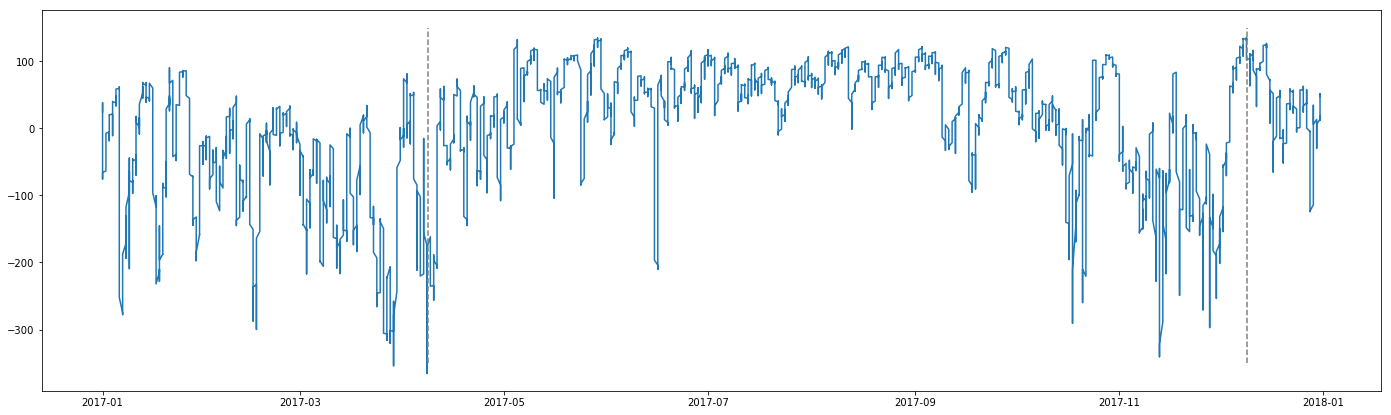

In [52]:
fig, ax = plt.subplots(figsize = (24,7))
ax.plot([datetime.date(2017,1,1) + datetime.timedelta(hours = n) for n in range(8760)],
         A[:,0].T)
ax.plot((datetime.datetime(2017,1,1) + datetime.timedelta(hours = 8213), 
         datetime.datetime(2017,1,1) + datetime.timedelta(hours = 8213)), 
        (-350,150), '--', color = 'grey')
ax.plot((datetime.datetime(2017,1,1) + datetime.timedelta(hours = 2337), 
         datetime.datetime(2017,1,1) + datetime.timedelta(hours = 2337)), 
        (-350,150), '--', color = 'grey');

In [53]:
print('PercentVar[0] = ',PercentVar[0])

PercentVar[0] =  0.20218913182660772


In [54]:
print('PercentVar[1] = ',PercentVar[1])

PercentVar[1] =  0.06585124098585858


In [31]:
from salishsea_tools import timeseries_tools, geo_tools, tidetools, viz_tools

In [28]:
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
bathy, X, Y = tidetools.get_bathy_data(grid)
lats = grid.variables['nav_lat'][350:750:5,100::5]
lons = grid.variables['nav_lon'][350:750:5,100::5]

compressed_lats0 = np.ma.masked_array(lats, 
                                     mask = 1 - 
                                      mesh.variables['tmask'][0,0,350:750:5,100::5]).compressed()
compressed_lons0 = np.ma.masked_array(lons, 
                                     mask = 1 
                                      - mesh.variables['tmask'][0,0,350:750:5,100::5]).compressed()
Yinds = np.array([])
Xinds = np.array([])
for lon, lat in zip(compressed_lons0, compressed_lats0):
    Yind, Xind = geo_tools.find_closest_model_point(lon, lat, X[350:750:5,100::5],
                                                    Y[350:750:5,100::5], 
                                                    land_mask = bathy.mask[350:750:5,100::5])
    Yinds = np.append(Yinds, Yind)
    Xinds = np.append(Xinds, Xind)

In [35]:
import cmocean

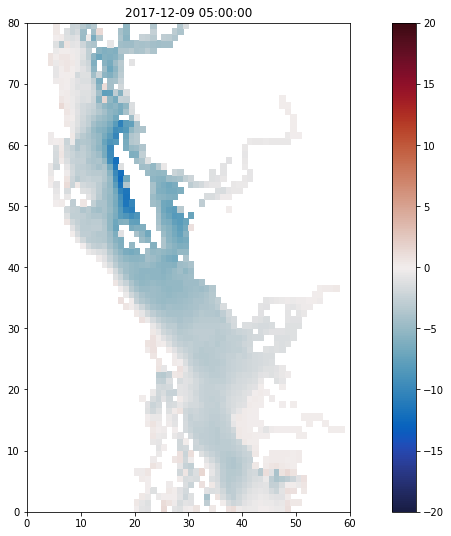

In [49]:
gridded = np.zeros((80,60))
for Yind, Xind, data in zip(Yinds, Xinds, Z_0[8213,:]):
    gridded[int(Yind), int(Xind)] = data
fig, ax = plt.subplots(figsize = ((15,9)))
z = ax.pcolormesh(np.ma.masked_array(gridded, 
                                     mask = 1 - 
                                     mesh.variables['tmask'][0,0,350:750:5, 100::5]),
                  vmin = -20, vmax = 20, 
                  cmap = cmocean.cm.balance)
ax.set_title(datetime.datetime(2017,1,1) + datetime.timedelta(hours = 8213))
fig.colorbar(z, ax=ax)
viz_tools.set_aspect(ax);

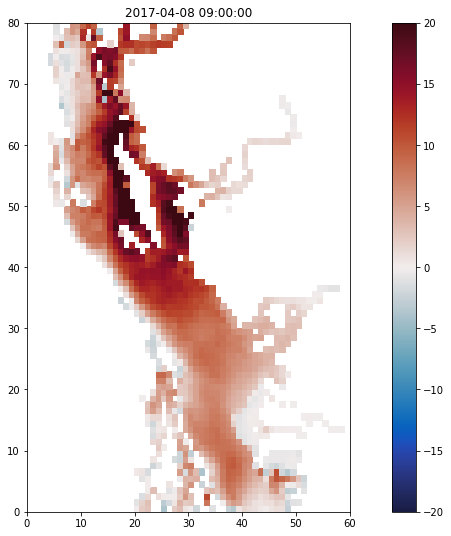

In [50]:
gridded = np.zeros((80,60))
for Yind, Xind, data in zip(Yinds, Xinds, Z_0[2337,:]):
    gridded[int(Yind), int(Xind)] = data
fig, ax = plt.subplots(figsize = ((15,9)))
z = ax.pcolormesh(np.ma.masked_array(gridded, 
                                     mask = 1 - 
                                     mesh.variables['tmask'][0,0,350:750:5, 100::5]),
                  vmin = -20, vmax = 20, 
                  cmap = cmocean.cm.balance)
ax.set_title(datetime.datetime(2017,1,1) + datetime.timedelta(hours = 2337))
fig.colorbar(z, ax=ax)
viz_tools.set_aspect(ax);